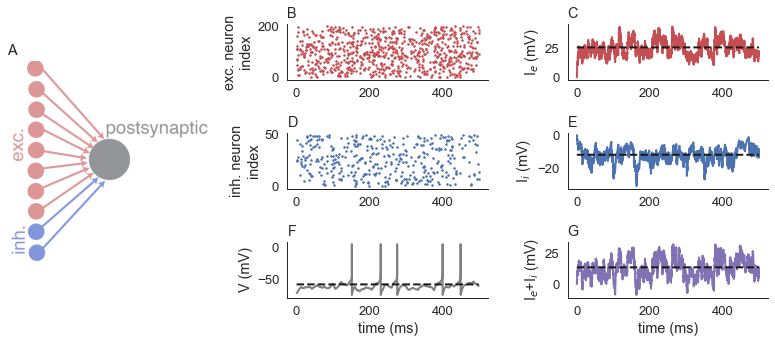

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################


# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)
    
# Discretized time
T=500 
dt=.1 
time=np.arange(0,T,dt)

# Presynaptic rates of all
# presynaptic e and i neurons
re=8/1000
ri=15/1000

# Number of exc and inh synapses
Ke=200
Ki=50

# Synapse parameters
je=16.0
ji=-16.0
Je=je+np.zeros(Ke)
Ji=ji+np.zeros(Ki)
taue=5
taui=5

# Stationary mean of Ie and Ii 
# from mean-field theory
IeBar=Ke*je*re
IiBar=Ki*ji*ri


# Neuron parameters
EL=-72 
taum=10
Vth=5
Vre=-75
VT=-55
D=2

# Generate spike densities
Se=np.random.poisson(re*dt,(Ke,len(time)))/dt
Si=np.random.poisson(ri*dt,(Ki,len(time)))/dt


# Euler solver to compute Is and V
Ie=np.zeros_like(time)
Ii=np.zeros_like(time)
V=np.zeros_like(time)
PostSpikeTimes=[]
V[0]=EL
for i in range(len(time)-1):

    # Euler step
    V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)+Ie[i]+Ii[i])/taum    
    Ie[i+1]=Ie[i]+dt*(-Ie[i]+Je@Se[:,i])/taue
    Ii[i+1]=Ii[i]+dt*(-Ii[i]+Ji@Si[:,i])/taui
    
    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre 
        V[i]=Vth  # This makes plots nicer
        PostSpikeTimes=np.append(PostSpikeTimes,time[i+1])        


# Stationary mean membrane potential of a leaky integrator
IBar=IeBar+IiBar
V0=EL+IBar

# Extract spike times and trial numbers
# to make raster plot
[I,J]=np.nonzero(Se)
eSpikeTimes=J*dt
eNeuronNumbers=I 
[I,J]=np.nonzero(Si)
iSpikeTimes=J*dt
iNeuronNumbers=I 

# Make figure
plt.subplots(figsize=(11,5))

plt.subplot(1,3,1)
#im = plt.imread('EIFwithPoissonSynapses.png')

imurl='https://www.dropbox.com/s/o656dx13yyotx3s/EIFwithPoissonSynapses.png'

plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')


# Raster plot
plt.subplot(3,3,2)
plt.plot(eSpikeTimes,eNeuronNumbers,'r.',markersize=3)
#plt.xlabel('time (ms)')
plt.ylabel('exc. neuron\nindex')
plt.title('B',loc='left')
sns.despine()

plt.subplot(3,3,3)
plt.plot(time,Ie,'r')
plt.plot(time,IeBar+np.zeros_like(time),'k--')
plt.ylabel('I$_e$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(3,3,5)
plt.plot(iSpikeTimes,iNeuronNumbers,'b.',markersize=3)
#plt.xlabel('time (ms)')
plt.ylabel('inh. neuron\nindex')
plt.title('D',loc='left')
sns.despine()


plt.subplot(3,3,6)
plt.plot(time,Ii,'b')
plt.plot(time,IiBar+np.zeros_like(time),'k--')
plt.ylabel('I$_i$ (mV)')
plt.title('E',loc='left')
sns.despine()

plt.subplot(3,3,8)
plt.plot(time,V,color='gray')
plt.plot(time,V0+0*time,'k--')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('F',loc='left')

plt.subplot(3,3,9)
plt.plot(time,Ie+Ii,'m')
plt.plot(time,IBar+np.zeros_like(time),'k--')
plt.ylabel('I$_e$+I$_i$ (mV)')
plt.xlabel('time (ms)')
sns.despine()
plt.title('G',loc='left')

plt.tight_layout()

# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/EIFwithPoissonSynapses.pdf')
